<a href="https://colab.research.google.com/github/yunyeong-choi/2022fin/blob/master/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C%20%EB%B0%B0%EC%9A%B0%EB%8A%94%20%EC%8B%A4%EC%A0%84%20%EA%B8%88%EC%9C%B5%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D(%ED%80%80%ED%8A%B8)/6%EA%B0%95_%EC%9D%B4%EB%8F%99%ED%8F%89%EA%B7%A0%EC%84%A0_%EC%9D%B4%EB%8F%99%ED%8F%89%EA%B7%A0%EC%84%A0%EB%8F%8C%ED%8C%8C%EC%A0%84%EB%9E%B5_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석을 통해 나만의 주식 투자 전략 만들어보기.
- 재무제표, 주가 등 주식 데이터 파일(엑셀 csv)을 읽어서 코딩으로 그래프를 그려보자  
- 시뮬레이션2. 차트 이동평균선 분석을 통해 투자하면, 수익률이 어떨까?  

## 라이브러리 임포트

In [1]:
# COLAB 환경을 위한 나눔고딕 한글폰트 설치  --> 진행 후,  런타임 > 런타임 다시 시작을 해 주세요. 다시 시작 후에는 이 부분 실행 X
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (38.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
# matplotlib 임포트,  주피터 출력설정,  한글 글꼴 지정
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'NanumBarunGothic'  # (Colab 용) 한글 출력을 위한 글꼴 설정

In [2]:
import numpy as np
import pandas as pd

#### print문에 변수를 함께 출력하는 방법

In [3]:
print("Hello")

Hello


In [4]:
a = 30
print("숫자 a는 " + str(a) + " 입니다.")

숫자 a는 30 입니다.


In [6]:
b = 150
print(f"f-string 문법을 이용한  숫자 b 출력 = {b}")

f-string 문법을 이용한  숫자 b 출력 = 150


In [7]:
print(f"f string을 활용한 숫자 b 출력={b}")

f string을 활용한 숫자 b 출력=150


In [8]:
pie = 3.14159265358979323846264338327950288
print(f"원주율 = {pie}")

원주율 = 3.141592653589793


In [9]:
pie = 3.14159265358979323846264338327950288
print(f"원주율 (반올림) = {pie:.2f}")

원주율 (반올림) = 3.14


In [10]:
print(f"원주율={pie:.2f}")

원주율=3.14


- 연산도 가능!

In [11]:
print(f"{pie*2 + 10}")

16.283185307179586


## 데이터 불러오기

In [12]:
!wget "https://drive.google.com/uc?export=download&id=1VrrOVibE-oxdxY30SnfCDJ6Ghv38jXm1" -O "stock_data.zip"

--2022-10-03 05:46:52--  https://drive.google.com/uc?export=download&id=1VrrOVibE-oxdxY30SnfCDJ6Ghv38jXm1
Resolving drive.google.com (drive.google.com)... 172.253.122.100, 172.253.122.102, 172.253.122.101, ...
Connecting to drive.google.com (drive.google.com)|172.253.122.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0et33b4ha2e9ogcjgu01shgv3fcbmcio/1664775975000/03135380322884973343/*/1VrrOVibE-oxdxY30SnfCDJ6Ghv38jXm1?e=download&uuid=84b984f0-eae9-412a-bcb5-d638f797ca01 [following]
--2022-10-03 05:46:58--  https://doc-00-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0et33b4ha2e9ogcjgu01shgv3fcbmcio/1664775975000/03135380322884973343/*/1VrrOVibE-oxdxY30SnfCDJ6Ghv38jXm1?e=download&uuid=84b984f0-eae9-412a-bcb5-d638f797ca01
Resolving doc-00-4g-docs.googleusercontent.com (doc-00-4g-docs.googleusercontent.com)... 172.253.122.132, 

In [13]:
!unzip stock_data.zip

Archive:  stock_data.zip
  inflating: stock.adj_close.csv     
  inflating: stock.eq.csv            
  inflating: stock.liab.csv          
  inflating: stock.mc.csv            
  inflating: stock.ni.csv            
  inflating: stock.op.csv            
  inflating: stock.sales.csv         
  inflating: stockinfo.itemname.csv  
  inflating: stockinfo.sector.csv    


## 3.2. 주식 데이터 및 기업 분석 배우기  
### [ 데이터 설명 ]
**일별 데이터:**
- 데이터 파일: __stock.*{테이블이름}*.csv__
- 데이터 기간: 2018-06-01 ~ 2020-10-14, 약 2년 4개월, 비영업일 제외
- 종목 수: 2,278 개
- 단위 (테이블이름, 설명)
    - 원 단위: adj_close 주가
    - 백만원 단위 : mc 시가총액, sales 매출액, op 영업이익, ni 순이익, liab 부채, eq 자본, asset_cur 유동자산 
        
  
**색인 데이터:**
- __stockinfo.itemname.csv__ : 종목 코드와 종목 명
- __stockinfo.sector.csv__ : 종목 코드와 해당하는 섹터

#### 일자별 주식 데이터 불러오기 (dict 및 for문 사용)

-  parse_dates=True : 날짜를 datetime으로 변경

In [14]:
d = {}

# For문 이용하여 읽기- 주가, 시가총액, 매출액, 영업익, 순이익, 부채, 자본
# adj_close : 주가
# mc : 시가총액
# sales : 매출액
# op : 영업익
# ni : 순이익
# liab : 부채
# eq : 자본
for data_name in ['adj_close', 'mc', 'sales', 'op', 'ni', 'liab', 'eq']:
    print(f"read csv {data_name} ...")
    d[data_name] = pd.read_csv(f"stock.{data_name}.csv", index_col=0, encoding='cp949', parse_dates=True)
    print(f"done!  {d[data_name].shape}")

read csv adj_close ...
done!  (2278, 582)
read csv mc ...
done!  (2278, 582)
read csv sales ...
done!  (2278, 582)
read csv op ...
done!  (2278, 582)
read csv ni ...
done!  (2278, 582)
read csv liab ...
done!  (2278, 582)
read csv eq ...
done!  (2278, 582)


In [15]:
# 데이터 확인하기
d

{'adj_close':          2018-06-01  2018-06-04  2018-06-05  2018-06-07  2018-06-08  \
 Symbol                                                                
 A000020     11550.0     11750.0     11700.0     11650.0     11500.0   
 A000030     15500.0     15950.0     16050.0     16500.0     16600.0   
 A000040      2992.0      3021.0      3025.0      3069.0      3045.0   
 A000050     13200.0     13550.0     13600.0     13800.0     13800.0   
 A000060     20050.0     20050.0     20150.0     20050.0     20400.0   
 ...             ...         ...         ...         ...         ...   
 A950160     38600.0     36400.0     36350.0     38700.0     40200.0   
 A950170     13850.0     14250.0     14450.0     14300.0     14150.0   
 A950180         NaN         NaN         NaN         NaN         NaN   
 A950190         NaN         NaN         NaN         NaN         NaN   
 A950200         NaN         NaN         NaN         NaN         NaN   
 
          2018-06-11  2018-06-12  2018-06-14  201

In [16]:
d['adj_close']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,11550.0,11750.0,11700.0,11650.0,11500.0,11500.0,11650.0,12000.0,11800.0,11450.0,...,22100.0,22000.0,21850.0,24100.0,23750.0,23500.0,24150.0,24000.0,24300.0,23850.0
A000030,15500.0,15950.0,16050.0,16500.0,16600.0,16650.0,16850.0,16500.0,16100.0,16350.0,...,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0
A000040,2992.0,3021.0,3025.0,3069.0,3045.0,2984.0,2976.0,3033.0,3033.0,3017.0,...,771.0,743.0,767.0,829.0,810.0,860.0,863.0,863.0,850.0,874.0
A000050,13200.0,13550.0,13600.0,13800.0,13800.0,13800.0,13650.0,13850.0,14500.0,14550.0,...,10750.0,10500.0,10550.0,10850.0,10900.0,10900.0,11000.0,11000.0,10850.0,10800.0
A000060,20050.0,20050.0,20150.0,20050.0,20400.0,20150.0,20700.0,20950.0,20150.0,20900.0,...,12750.0,12750.0,12850.0,13150.0,13300.0,13350.0,13900.0,13950.0,13700.0,13550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,38600.0,36400.0,36350.0,38700.0,40200.0,39250.0,38300.0,38350.0,39000.0,37600.0,...,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0
A950170,13850.0,14250.0,14450.0,14300.0,14150.0,13650.0,14050.0,13600.0,13550.0,11900.0,...,3820.0,3900.0,4050.0,4070.0,4190.0,4160.0,4320.0,4445.0,4440.0,4335.0
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12400.0,12800.0,12900.0,12800.0,12850.0,13050.0,13050.0,12900.0,12650.0,13350.0


In [17]:
d['mc']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,322608.0,328195.0,326798.0,325402.0,321212.0,321212.0,325402.0,335178.0,329591.0,319815.0,...,617300.0,614500.0,610300.0,673100.0,663400.0,656400.0,674500.0,670400.0,678700.0,666200.0
A000030,10478000.0,10782200.0,10849800.0,11154000.0,11221600.0,11255400.0,11390600.0,11154000.0,10883600.0,11052600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000040,88263.0,89101.0,89221.0,90538.0,89820.0,88023.0,87784.0,89460.0,89460.0,88981.0,...,70700.0,68100.0,70300.0,76000.0,74200.0,78800.0,79100.0,79100.0,77900.0,80100.0
A000050,361882.0,371477.0,372848.0,378331.0,378331.0,378331.0,374218.0,379701.0,397521.0,398892.0,...,294700.0,287900.0,289200.0,297500.0,298800.0,298800.0,301600.0,301600.0,297500.0,296100.0
A000060,2212277.0,2212277.0,2223311.0,2212277.0,2250895.0,2223311.0,2283997.0,2311581.0,2223311.0,2306064.0,...,1449400.0,1449400.0,1460800.0,1494900.0,1511900.0,1517600.0,1580200.0,1585800.0,1557400.0,1540400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,2350704.0,2216726.0,2213681.0,2356794.0,2448142.0,2390288.0,2332434.0,2335479.0,2375063.0,2291614.0,...,489600.0,489600.0,489600.0,489600.0,489600.0,489600.0,489600.0,489600.0,489600.0,489600.0
A950170,484826.0,498829.0,505830.0,500579.0,495328.0,477825.0,491828.0,476075.0,474325.0,416566.0,...,133700.0,136500.0,141800.0,142500.0,146700.0,145600.0,151200.0,155600.0,155400.0,151700.0
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,261200.0,269600.0,271700.0,269600.0,270600.0,274900.0,274900.0,271700.0,266400.0,281200.0


In [18]:
d['sales']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,...,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05
A000030,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,...,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06
A000040,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,...,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05
A000050,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,...,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05
A000060,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,...,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
d['ni']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,...,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04
A000030,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,...,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06
A000040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000050,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,...,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04
A000060,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,...,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 색인 데이터 로드 및 병합 (concat 사용)

In [20]:
itemname = pd.read_csv("stockinfo.itemname.csv", index_col=0, encoding='cp949')
sector = pd.read_csv("stockinfo.sector.csv", index_col=0, encoding='cp949')

In [21]:
stock_info = pd.concat([itemname, sector], axis=1)

In [22]:
stock_info

,itemname,Sector
Symbol,,
A000020,동화약품,제약_및_바이오
A000030,우리은행,NaN
A000040,KR모터스,자동차_및_부품
A000050,경방,내구_소비재_및_의류
A000060,메리츠화재,보험
...,...,...
A950160,코오롱티슈진,NaN
A950170,JTC,NaN
A950180,SNK,NaN


## 주식 데이터 분석 및 EDA 수행하기

#### 재무제표, 주가 등 주식 데이터 파일 읽어서 코딩으로 그래프를 그려보자

In [23]:
# 코드와 종목 이름을 선택합니다
code = "A005930"
codename = stock_info.loc[code, 'itemname']
code, codename

('A005930', '삼성전자')

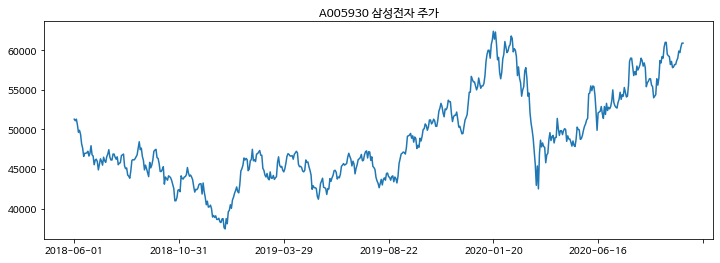

In [24]:
d['adj_close'].loc[code, :].plot(figsize=(12,4), title=f'{code} {codename} 주가');

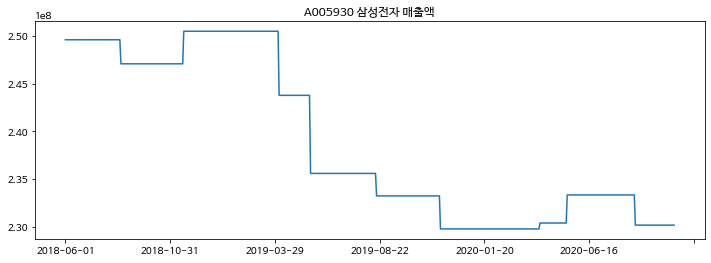

In [25]:
d['sales'].loc[code, :].plot(figsize=(12,4), title=f'{code} {codename} 매출액');

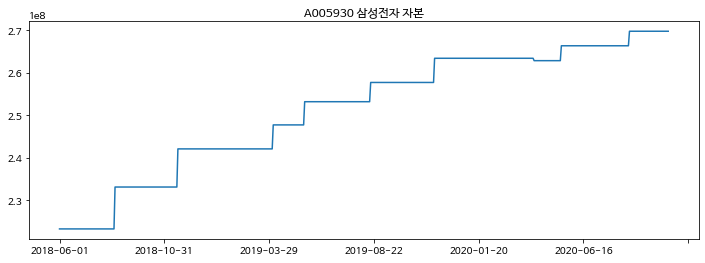

In [26]:
d['eq'].loc[code, :].plot(figsize=(12,4), title=f'{code} {codename} 자본');

#### 주가의 이동평균선 그려보기
- adj_close : 주가
* `.rolling()` 은 직전 n개에 대해 Aggregation 준비를 해주는 함수입니다.
* 아래 코드를 보면, 실제 Aggregation은 `.mean()`이 수행한 것을 알 수 있습니다.
* `.rolling()` 의 인자로는 axis= , windows= (직전 n개 숫자 지정) 등이 있습니다.
* `plot()`을 한번에 여러 개 실행함으로써, 같은 figure에 그림을 그립니다.

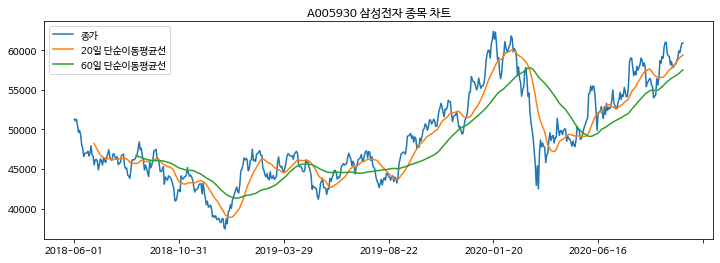

In [27]:
d['adj_close'].loc[code, :].plot(figsize=(12,4), label='종가');
d['adj_close'].loc[code, :].rolling(20).mean().plot(label='20일 단순이동평균선');
d['adj_close'].loc[code, :].rolling(60).mean().plot(label='60일 단순이동평균선');

plt.title(f"{code} {codename} 종목 차트")
plt.legend();

#### 지수이동편균선(Exponentially Weighted Moving Average) 구해보기
* `.ewm()` 을 이용해서 지수 이동평균선을 구할 수 있습니다.

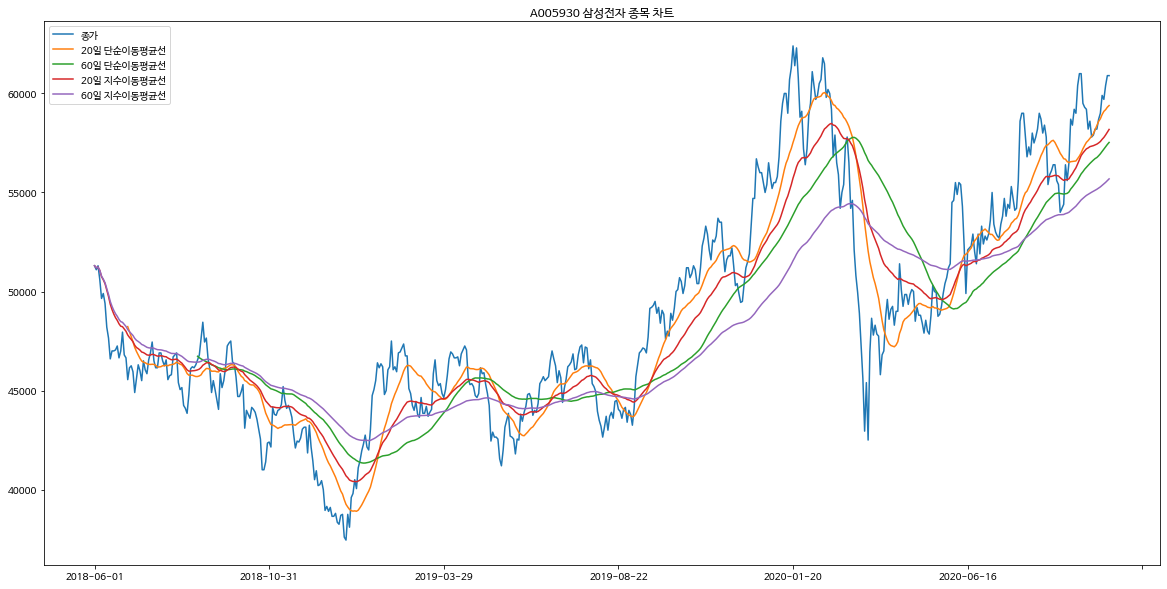

In [28]:
d['adj_close'].loc[code, :].plot(figsize=(20,10), label='종가');
d['adj_close'].loc[code, :].rolling(20).mean().plot(label='20일 단순이동평균선');
d['adj_close'].loc[code, :].rolling(60).mean().plot(label='60일 단순이동평균선');
d['adj_close'].loc[code, :].ewm(20).mean().plot(label='20일 지수이동평균선');
d['adj_close'].loc[code, :].ewm(60).mean().plot(label='60일 지수이동평균선');

plt.title(f"{code} {codename} 종목 차트")
plt.legend();

##### <연습문제 3-4>
'A000660' 종목의 마지막 60일 동안의, 주가와 주가 5일 이동평균선을 그려보세요

In [37]:
temp_code='A000660'
codename = stock_info.loc[code, 'itemname']
d['adj_close'].loc[temp_code].iloc[-60:]

2020-07-16    82700.0
2020-07-17    82900.0
2020-07-20    82200.0
2020-07-21    84100.0
2020-07-22    83200.0
2020-07-23    82400.0
2020-07-24    83700.0
2020-07-27    82800.0
2020-07-28    83100.0
2020-07-29    83200.0
2020-07-30    85300.0
2020-07-31    82800.0
2020-08-03    81800.0
2020-08-04    81600.0
2020-08-05    80700.0
2020-08-06    81100.0
2020-08-07    80600.0
2020-08-10    81400.0
2020-08-11    81300.0
2020-08-12    81000.0
2020-08-13    80700.0
2020-08-14    80200.0
2020-08-18    78100.0
2020-08-19    75000.0
2020-08-20    71800.0
2020-08-21    74500.0
2020-08-24    75500.0
2020-08-25    77000.0
2020-08-26    78800.0
2020-08-27    79100.0
2020-08-28    77800.0
2020-08-31    75100.0
2020-09-01    75200.0
2020-09-02    75500.0
2020-09-03    78700.0
2020-09-04    78700.0
2020-09-07    78400.0
2020-09-08    79400.0
2020-09-09    77300.0
2020-09-10    76600.0
2020-09-11    78400.0
2020-09-14    80000.0
2020-09-15    81900.0
2020-09-16    81500.0
2020-09-17    82200.0
2020-09-18

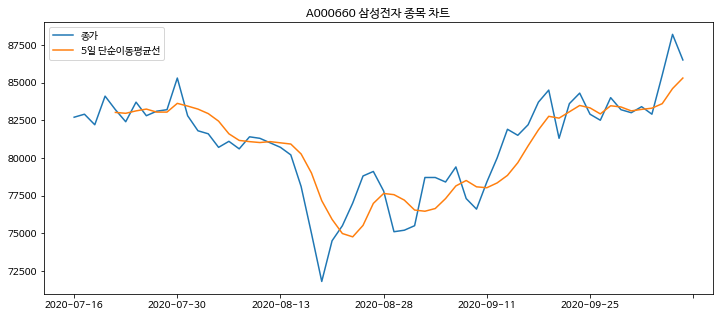

In [38]:
d['adj_close'].loc[temp_code].iloc[-60:].plot(figsize=(12,5),label='종가')
d['adj_close'].loc[temp_code].iloc[-60:].rolling(5).mean().plot(label='5일 단순이동평균선');
plt.title(f"{temp_code} {codename} 종목 차트")
plt.legend();

In [39]:
temp_code = 'A000660'
codename = stock_info.loc[temp_code, 'itemname']
d['adj_close'].loc[temp_code].iloc[-60:]

2020-07-16    82700.0
2020-07-17    82900.0
2020-07-20    82200.0
2020-07-21    84100.0
2020-07-22    83200.0
2020-07-23    82400.0
2020-07-24    83700.0
2020-07-27    82800.0
2020-07-28    83100.0
2020-07-29    83200.0
2020-07-30    85300.0
2020-07-31    82800.0
2020-08-03    81800.0
2020-08-04    81600.0
2020-08-05    80700.0
2020-08-06    81100.0
2020-08-07    80600.0
2020-08-10    81400.0
2020-08-11    81300.0
2020-08-12    81000.0
2020-08-13    80700.0
2020-08-14    80200.0
2020-08-18    78100.0
2020-08-19    75000.0
2020-08-20    71800.0
2020-08-21    74500.0
2020-08-24    75500.0
2020-08-25    77000.0
2020-08-26    78800.0
2020-08-27    79100.0
2020-08-28    77800.0
2020-08-31    75100.0
2020-09-01    75200.0
2020-09-02    75500.0
2020-09-03    78700.0
2020-09-04    78700.0
2020-09-07    78400.0
2020-09-08    79400.0
2020-09-09    77300.0
2020-09-10    76600.0
2020-09-11    78400.0
2020-09-14    80000.0
2020-09-15    81900.0
2020-09-16    81500.0
2020-09-17    82200.0
2020-09-18

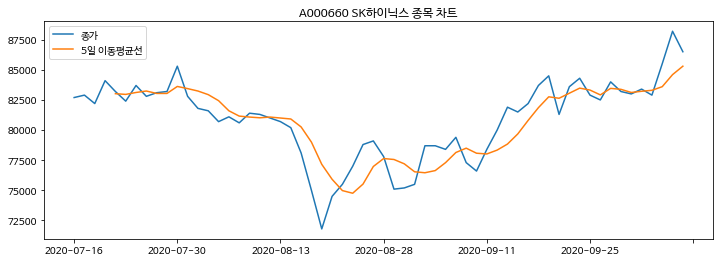

In [40]:

d['adj_close'].loc[temp_code].iloc[-60:].plot(figsize=(12,4), label='종가');
d['adj_close'].loc[temp_code].iloc[-60:].rolling(5).mean().plot(label='5일 이동평균선');

plt.title(f"{temp_code} {codename} 종목 차트")
plt.legend();

## 가설과 실험 수행하기

#### 시뮬레이션2. 차트 이동평균선 분석을 통해 투자하면, 수익률이 어떨까?

In [49]:
# 20일 이동평균선 딕셔너리에 할당하기
d['adj_close_sma20d'] = d['adj_close'].rolling(20, axis=1).mean()
d['adj_close_sma20d'].iloc[:,18:] #20일 이후 시점부터 평균 계산.

,2018-06-29,2018-07-02,2018-07-03,2018-07-04,2018-07-05,2018-07-06,2018-07-09,2018-07-10,2018-07-11,2018-07-12,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,NaN,11192.00,11114.5,11049.50,10984.5,10924.50,10872.0,10822.0,10764.5,10704.50,...,24580.00,24507.5,24417.5,24375.00,24295.0,24210.00,24140.00,24157.5,24145.00,24040.00
A000030,NaN,16295.00,16342.5,16365.00,16375.0,16387.50,16407.5,16405.0,16397.5,16397.50,...,14800.00,14800.0,14800.0,14800.00,14800.0,14800.00,14800.00,14800.0,14800.00,14800.00
A000040,NaN,2853.05,2820.8,2784.65,2748.9,2711.35,2688.4,2668.7,2648.8,2625.65,...,822.80,824.7,826.3,821.60,817.4,812.90,807.05,803.6,809.05,809.00
A000050,NaN,13910.00,13927.5,13940.00,13950.0,13950.00,13952.5,13947.5,13982.5,13987.50,...,10967.50,10965.0,10977.5,10992.50,10995.0,10995.00,10990.00,10972.5,10937.50,10902.50
A000060,NaN,20042.50,20005.0,19975.00,19930.0,19905.00,19860.0,19820.0,19742.5,19655.00,...,12842.50,12842.5,12852.5,12877.50,12905.0,12942.50,13002.50,13065.0,13117.50,13160.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,37607.50,37482.5,37535.00,37662.5,37657.50,37625.0,37737.5,37970.0,38185.00,...,9004.50,8928.0,8851.5,8775.00,8698.5,8622.00,8545.50,8469.0,8392.50,8316.00
A950170,NaN,12880.00,12825.0,12727.50,12622.5,12577.50,12567.5,12580.0,12540.0,12500.00,...,4032.25,4034.5,4036.0,4032.75,4038.0,4045.25,4059.25,4079.0,4088.75,4091.75
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13122.50,13095.0,13080.0,13055.00,13042.5,13047.50,13040.00,13027.5,13005.00,13015.00


In [53]:
# 시뮬레이션을 위한 날짜 변수와 날짜 인덱스 변수 만들기
date_list = d['adj_close'].columns
date_i = np.arange(len(date_list)) #인덱스 변수 만들기
len(date_i)

582

In [61]:
date_list

Index(['2018-06-01', '2018-06-04', '2018-06-05', '2018-06-07', '2018-06-08',
       '2018-06-11', '2018-06-12', '2018-06-14', '2018-06-15', '2018-06-18',
       ...
       '2020-09-25', '2020-09-28', '2020-09-29', '2020-10-05', '2020-10-06',
       '2020-10-07', '2020-10-08', '2020-10-12', '2020-10-13', '2020-10-14'],
      dtype='object', length=582)

In [51]:
# 날짜 변수 확인하기 (앞부분)
date_list[:5], date_i[:5]

(Index(['2018-06-01', '2018-06-04', '2018-06-05', '2018-06-07', '2018-06-08'], dtype='object'),
 array([0, 1, 2, 3, 4]))

In [52]:
# 시뮬레이션 할 종목 선택하기
code = 'A060250'   # 'A060250' NHN한국사이버결제,   'A068270' 셀트리온
code_name = stock_info.loc[code, 'itemname']
code, code_name

('A060250', 'NHN한국사이버결제')

##### 20일 이평선 상향 돌파 신호 포착하기

In [55]:
print("20일 이동평균선 상향 돌파 Signal")

보유일=20
for i in date_i:
    
    # (첫 날)과  (마지막날-20일전) 이후는 계산을 할 수 없으므로 제외합니다
    if i < 1 or i > len(date_list) - 보유일:
        continue
    
    prev_date = date_list[i-1]
    now_date = date_list[i]
    
    직전_주가 = d['adj_close'].loc[code, prev_date]
    당일_주가 = d['adj_close'].loc[code, now_date]
    
    직전_이평선 = d['adj_close_sma20d'].loc[code, prev_date]
    당일_이평선 = d['adj_close_sma20d'].loc[code, now_date]
    
    # 20일 골든 크로스의 조건 (어제는 이평선 밑, 당일은 이평선 위)
    if 직전_주가 < 직전_이평선 and 당일_주가 > 당일_이평선:
        print(f"  - {now_date}  Signal 발생!  직전 주가 {직전_주가} 이평선 {직전_이평선} ,  당일 주가 {당일_주가} 이평선 {당일_이평선}")

20일 이동평균선 상향 돌파 Signal
  - 2018-07-09  Signal 발생!  직전 주가 12230.0 이평선 12435.4 ,  당일 주가 13090.0 이평선 12409.15
  - 2018-07-27  Signal 발생!  직전 주가 12612.0 이평선 12831.9 ,  당일 주가 13520.0 이평선 12896.4
  - 2018-08-21  Signal 발생!  직전 주가 13615.0 이평선 13646.4 ,  당일 주가 13759.0 이평선 13718.05
  - 2018-08-28  Signal 발생!  직전 주가 13520.0 이평선 13835.15 ,  당일 주가 13950.0 이평선 13851.9
  - 2018-11-09  Signal 발생!  직전 주가 10415.0 이평선 10599.05 ,  당일 주가 10701.0 이평선 10599.05
  - 2018-11-14  Signal 발생!  직전 주가 10032.0 이평선 10501.15 ,  당일 주가 10510.0 이평선 10448.6
  - 2018-11-16  Signal 발생!  직전 주가 10367.0 이평선 10396.05 ,  당일 주가 11179.0 이평선 10386.5
  - 2018-12-11  Signal 발생!  직전 주가 11227.0 이평선 11585.0 ,  당일 주가 11991.0 이평선 11682.95
  - 2019-01-10  Signal 발생!  직전 주가 11400.0 이평선 11774.85 ,  당일 주가 12000.0 이평선 11813.5
  - 2019-04-01  Signal 발생!  직전 주가 12400.0 이평선 12537.5 ,  당일 주가 12650.0 이평선 12532.5
  - 2019-05-31  Signal 발생!  직전 주가 12850.0 이평선 13260.0 ,  당일 주가 13300.0 이평선 13202.5
  - 2019-07-22  Signal 발생!  직전 주가 18800.0 이평선 18927.5 ,

##### 매도시 주가 및 수익률 계산 코드 추가
## 전략 : 이동평균선 상향 돌파시 매수후 20일 보유 후 매도

In [56]:
print("20일 이동평균선 상향 돌파 Signal")

보유일 = 20

for i in date_i:
    
    # (첫 날)과  (마지막날-20일전) 이후는 계산을 할 수 없으므로 제외합니다
    if i < 1 or i > len(date_list) - 보유일:
        continue
    
    prev_date = date_list[i-1]
    now_date = date_list[i]
    
    직전_주가 = d['adj_close'].loc[code, prev_date]
    당일_주가 = d['adj_close'].loc[code, now_date]
    
    직전_이평선 = d['adj_close_sma20d'].loc[code, prev_date]
    당일_이평선 = d['adj_close_sma20d'].loc[code, now_date]
    
    # 20일 골든 크로스의 조건 (어제는 이평선 밑, 당일은 이평선 위)
    if 직전_주가 < 직전_이평선 and 당일_주가 > 당일_이평선:
        
        #--------------------------------------------------------------------------------------------start
        sell_date = date_list[i + 보유일]
        매도시_주가 = d['adj_close'].loc[code, sell_date]
        수익률 = (매도시_주가 / 당일_주가)*100 - 100
        
        print(f"  - {now_date}  Signal 발생!  매수주가 {당일_주가:.0f}  ->  매도주가 {매도시_주가:.0f}  , 수익률 {수익률:.3f} %")
        #--------------------------------------------------------------------------------------------end

20일 이동평균선 상향 돌파 Signal
  - 2018-07-09  Signal 발생!  매수주가 13090  ->  매도주가 13998  , 수익률 6.937 %
  - 2018-07-27  Signal 발생!  매수주가 13520  ->  매도주가 13520  , 수익률 0.000 %
  - 2018-08-21  Signal 발생!  매수주가 13759  ->  매도주가 12803  , 수익률 -6.948 %
  - 2018-08-28  Signal 발생!  매수주가 13950  ->  매도주가 12612  , 수익률 -9.591 %
  - 2018-11-09  Signal 발생!  매수주가 10701  ->  매도주가 11561  , 수익률 8.037 %
  - 2018-11-14  Signal 발생!  매수주가 10510  ->  매도주가 12039  , 수익률 14.548 %
  - 2018-11-16  Signal 발생!  매수주가 11179  ->  매도주가 12230  , 수익률 9.402 %
  - 2018-12-11  Signal 발생!  매수주가 11991  ->  매도주가 12300  , 수익률 2.577 %
  - 2019-01-10  Signal 발생!  매수주가 12000  ->  매도주가 13900  , 수익률 15.833 %
  - 2019-04-01  Signal 발생!  매수주가 12650  ->  매도주가 14600  , 수익률 15.415 %
  - 2019-05-31  Signal 발생!  매수주가 13300  ->  매도주가 18800  , 수익률 41.353 %
  - 2019-07-22  Signal 발생!  매수주가 19300  ->  매도주가 22500  , 수익률 16.580 %
  - 2019-07-31  Signal 발생!  매수주가 18700  ->  매도주가 21450  , 수익률 14.706 %
  - 2019-08-07  Signal 발생!  매수주가 18450  ->  매도주가 21000  , 수

##### 투자 수익률 합산을 위한 리스트를 생성하고, 결과 저장하기

In [57]:
print("20일 이동평균선 상향 돌파 Signal")

보유일 = 20

#--------------------------------------------------------------------------------------------start
signal_i_list = []
signal_date_list = []
signal_price_list = []
signal_return_list = []
#--------------------------------------------------------------------------------------------end


for i in date_i:
    if i < 1 or i > len(date_list) - 보유일:
        continue
    
    
    prev_date = date_list[i-1]
    now_date = date_list[i]
    
    직전_주가 = d['adj_close'].loc[code, prev_date]
    당일_주가 = d['adj_close'].loc[code, now_date]
    
    직전_이평선 = d['adj_close_sma20d'].loc[code, prev_date]
    당일_이평선 = d['adj_close_sma20d'].loc[code, now_date]
    
    
    if 직전_주가 < 직전_이평선 and 당일_주가 > 당일_이평선:
        
        sell_date = date_list[i+보유일]
        매도시_주가 = d['adj_close'].loc[code, sell_date]
        수익률 = (매도시_주가 / 당일_주가)*100 - 100
        
        print(f"  - {now_date}  Signal 발생!  매수주가 {당일_주가:.0f}  ->  매도주가 {매도시_주가:.0f}  , 수익률 {수익률:.3f} %")
        
        #--------------------------------------------------------------------------------------------start
        signal_i_list.append(i)
        signal_date_list.append(now_date)
        signal_price_list.append(당일_주가)
        signal_return_list.append(수익률)
        #--------------------------------------------------------------------------------------------end

20일 이동평균선 상향 돌파 Signal
  - 2018-07-09  Signal 발생!  매수주가 13090  ->  매도주가 13998  , 수익률 6.937 %
  - 2018-07-27  Signal 발생!  매수주가 13520  ->  매도주가 13520  , 수익률 0.000 %
  - 2018-08-21  Signal 발생!  매수주가 13759  ->  매도주가 12803  , 수익률 -6.948 %
  - 2018-08-28  Signal 발생!  매수주가 13950  ->  매도주가 12612  , 수익률 -9.591 %
  - 2018-11-09  Signal 발생!  매수주가 10701  ->  매도주가 11561  , 수익률 8.037 %
  - 2018-11-14  Signal 발생!  매수주가 10510  ->  매도주가 12039  , 수익률 14.548 %
  - 2018-11-16  Signal 발생!  매수주가 11179  ->  매도주가 12230  , 수익률 9.402 %
  - 2018-12-11  Signal 발생!  매수주가 11991  ->  매도주가 12300  , 수익률 2.577 %
  - 2019-01-10  Signal 발생!  매수주가 12000  ->  매도주가 13900  , 수익률 15.833 %
  - 2019-04-01  Signal 발생!  매수주가 12650  ->  매도주가 14600  , 수익률 15.415 %
  - 2019-05-31  Signal 발생!  매수주가 13300  ->  매도주가 18800  , 수익률 41.353 %
  - 2019-07-22  Signal 발생!  매수주가 19300  ->  매도주가 22500  , 수익률 16.580 %
  - 2019-07-31  Signal 발생!  매수주가 18700  ->  매도주가 21450  , 수익률 14.706 %
  - 2019-08-07  Signal 발생!  매수주가 18450  ->  매도주가 21000  , 수

##### 이동평균선 돌파 시뮬레이션, 그래프 그려보기

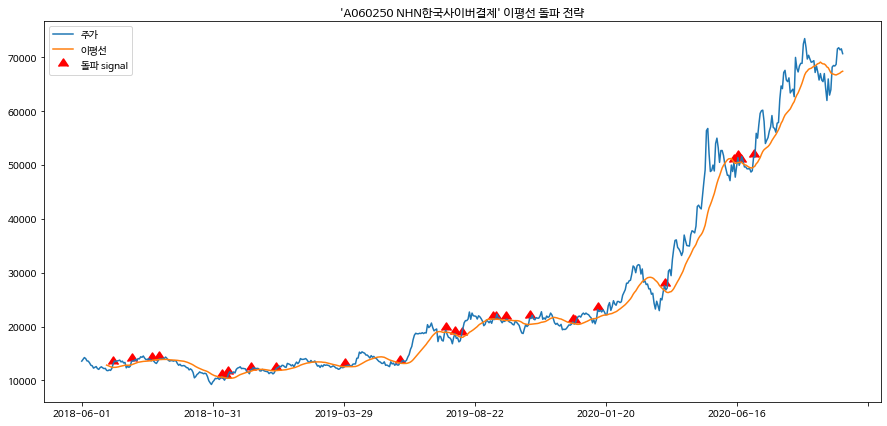

In [58]:
d['adj_close'].loc[code, :].plot(figsize=(15,7), label='주가');
d['adj_close_sma20d'].loc[code, :].plot(label='이평선');
plt.scatter(x=signal_i_list, y=signal_price_list, marker=10, color='red', s=100 , label='돌파 signal');

plt.title(f"'{code} {code_name}' 이평선 돌파 전략")
plt.legend();

##### 전체 매매 수익률 집계하기

In [59]:
수익률_합 = sum(signal_return_list)
평균_수익률 = 수익률_합 / len(signal_return_list)

단순_기간_수익률 = (d['adj_close'].loc[code][-1] / d['adj_close'].loc[code][0]) * 100 - 100

print(f"전체 매매 수익률 합  {수익률_합:.2f}%,  매매 당 평균 수익률  {평균_수익률:.2f}%,  "
      f"단순 기간 수익률 {단순_기간_수익률:.2f}%")

전체 매매 수익률 합  249.24%,  매매 당 평균 수익률  9.59%,  단순 기간 수익률 421.08%


##### <연습문제 3-6>
**이동평균선 돌파 시뮬레이션** 분석을 종목 '셀트리온'에 대해 수행하고, 결과를 출력해보세요

In [62]:
# 시뮬레이션 할 종목 선택하기
code = 'A068270'   # 'A060250' NHN한국사이버결제,   'A068270' 셀트리온
code_name = stock_info.loc[code, 'itemname']
code, code_name

('A068270', '셀트리온')

In [63]:
print("20일 이동평균선 상향 돌파 Signal")

보유일 = 20

#--------------------------------------------------------------------------------------------start
signal_i_list = []
signal_date_list = []
signal_price_list = []
signal_return_list = []
#--------------------------------------------------------------------------------------------end


for i in date_i:
    if i < 1 or i > len(date_list) - 보유일:
        continue
    
    
    prev_date = date_list[i-1]
    now_date = date_list[i]
    
    직전_주가 = d['adj_close'].loc[code, prev_date]
    당일_주가 = d['adj_close'].loc[code, now_date]
    
    직전_이평선 = d['adj_close_sma20d'].loc[code, prev_date]
    당일_이평선 = d['adj_close_sma20d'].loc[code, now_date]
    
    
    if 직전_주가 < 직전_이평선 and 당일_주가 > 당일_이평선:
        
        sell_date = date_list[i+보유일]
        매도시_주가 = d['adj_close'].loc[code, sell_date]
        수익률 = (매도시_주가 / 당일_주가)*100 - 100
        
        print(f"  - {now_date}  Signal 발생!  매수주가 {당일_주가:.0f}  ->  매도주가 {매도시_주가:.0f}  , 수익률 {수익률:.3f} %")
        
        #--------------------------------------------------------------------------------------------start
        signal_i_list.append(i)
        signal_date_list.append(now_date)
        signal_price_list.append(당일_주가)
        signal_return_list.append(수익률)
        #--------------------------------------------------------------------------------------------end

20일 이동평균선 상향 돌파 Signal
  - 2018-07-16  Signal 발생!  매수주가 275417  ->  매도주가 244450  , 수익률 -11.244 %
  - 2018-08-01  Signal 발생!  매수주가 263218  ->  매도주가 250080  , 수익률 -4.991 %
  - 2018-08-09  Signal 발생!  매수주가 258995  ->  매도주가 262279  , 수익률 1.268 %
  - 2018-08-21  Signal 발생!  매수주가 251957  ->  매도주가 281986  , 수익률 11.918 %
  - 2018-09-04  Signal 발생!  매수주가 262749  ->  매도주가 272133  , 수익률 3.571 %
  - 2018-11-19  Signal 발생!  매수주가 214891  ->  매도주가 201284  , 수익률 -6.332 %
  - 2018-11-26  Signal 발생!  매수주가 225682  ->  매도주가 197531  , 수익률 -12.474 %
  - 2019-01-10  Signal 발생!  매수주가 206789  ->  매도주가 202968  , 수익률 -1.848 %
  - 2019-01-28  Signal 발생!  매수주가 201536  ->  매도주가 195327  , 수익률 -3.081 %
  - 2019-03-06  Signal 발생!  매수주가 201536  ->  매도주가 184821  , 수익률 -8.294 %
  - 2019-03-12  Signal 발생!  매수주가 199625  ->  매도주가 195327  , 수익률 -2.153 %
  - 2019-04-09  Signal 발생!  매수주가 195327  ->  매도주가 200580  , 수익률 2.689 %
  - 2019-06-03  Signal 발생!  매수주가 184343  ->  매도주가 195805  , 수익률 6.218 %
  - 2019-07-03  Signal 발생!  매수

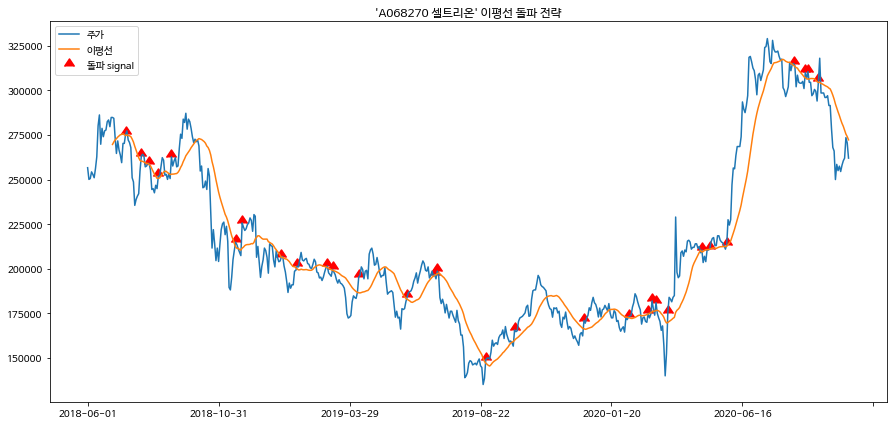

In [64]:
d['adj_close'].loc[code, :].plot(figsize=(15,7), label='주가');
d['adj_close_sma20d'].loc[code, :].plot(label='이평선');
plt.scatter(x=signal_i_list, y=signal_price_list, marker=10, color='red', s=100 , label='돌파 signal');

plt.title(f"'{code} {code_name}' 이평선 돌파 전략")
plt.legend();

In [65]:
수익률_합 = sum(signal_return_list)
평균_수익률 = 수익률_합 / len(signal_return_list)

단순_기간_수익률 = (d['adj_close'].loc[code][-1] / d['adj_close'].loc[code][0]) * 100 - 100

print(f"전체 매매 수익률 합  {수익률_합:.2f}%,  매매 당 평균 수익률  {평균_수익률:.2f}%,  "
      f"단순 기간 수익률 {단순_기간_수익률:.2f}%")

전체 매매 수익률 합  52.95%,  매매 당 평균 수익률  1.76%,  단순 기간 수익률 2.08%
